**DeapSECURE module 2: Dealing with Big Data**

# Session 3: Data Wrangling and Visualization

Welcome to the DeapSECURE online training program!
This is a Jupyter notebook for the hands-on learning activities of the
["Big Data" module](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/), Episode 5: ["Data Wrangling and Visualization"](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/30-data-wrangling-viz/index.html) .

## Objective

The goal of big data analytics is to obtain meaningful and valuable insight from the data, which can be translated into useful actions and/or decisions.
While in the previous notebooks we learn the basic capabilities of using _pandas_, in this notebook we are embarking some activities which can generate the desired insight from data.
We will learn how to use _pandas_ and visualization tools to uncover relationships, patterns, correlations from the Sherlock application dataset.

This notebook will give you a *taste* of a data scientist's work on **data wrangling** and **exploratory data analysis**.
These two steps are intertwined in practice; both are parts of **data preparation** step before the full data analysis takes place.
The goal of data preparation is to achieve a clean, consistent and processable state of data,
while at the same time familiarizing us with the characteristics of the data.
While many of the principles we learn here still hold, each problem and dataset has its own specific issues that may not generalize.
There is an art to this process, which needs to be learned through much practice and experience.


## Data Exploration Questions

Here are several data exploration questions we want to ask ourselves upon receiving a large Sherlock application dataset.
This dataset will contain resource utilization from two applications: WhatsApp and Facebook.

1. What are the statistical properties of the individual features of the dataset: mean, spread, distribution

2. Can we spot issues with the data that will require cleaning?

   - useless features
   - missing data
   - duplicate data
   - outliers

3. Can we extract some basic statistics about the applications through the data, such as:

   - which application uses more CPU cycles on average?
   - which application uses more memory on average?

4. Are there correlations among the features in the dataset?
   If there are, what do they look like?
   Correlations can uncover which features are most important to consider in data analysis.

Some of these questions are best answered by means of visual inspection;
therefore we will cover a few basic visualization techniques in this notebook.


**QUICK LINKS**
* [Setup](#sec-setup)
* [Loading Sherlock Data](#sec-load-sherlock)
* [Data Wrangling](#sec-data-wrangling)
* [Types of Data](#sec-types-of-data)
* [Cleaning Data](#sec-cleanData)
* [Visualization](#sec-visualization)
* [Feature Correlation](#sec-data-correlation)

<a id="sec-setup"></a>
## 1. Setup Instructions

If you are opening this notebook from Wahab cluster's OnDemand interface, you're all set.

If you obtained this notebook elsewhere, and you want to perform the exercises on Wahab cluster, please follow the steps outlined in our setup procedure:

1. Make sure you have activated your HPC service.
2. Point your web browser to https://ondemand.wahab.hpc.odu.edu/ and sign in with your MIDAS ID and password.
3. Create a new Jupyter session with the following parameters: Python version **3.7**, Python suite `tensorflow 2.6 + pytorch 1.10`, Number of Cores **1**, Number of GPU **0**, Partition `main`, and Number of Hours at least **4**. (See <a href="https://wiki.hpc.odu.edu/en/ood-jupyter" target="_blank">ODU HPC wiki</a> for more detailed help.)
4. From the JupyterLab launcher, start a new Terminal session. Then issue the following commands to get the necessary files:

       mkdir -p ~/CItraining/module-bd
       cp -pr /shared/DeapSECURE/module-bd/. ~/CItraining/module-bd

Using the file manager on the left sidebar, now change the working directory to `~/CItraining/module-bd`.
The file name of this notebook is `BigData-session-3.ipynb`.

### 1.1 Reminder

* Throughout this notebook, `#TODO` is used as a placeholder where you need to fill in with something appropriate. 

* To run a code in a cell, press `Shift+Enter`.

* <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf" target="_blank">Pandas cheatsheet</a> provides a reminder of most frequently used _pandas_ syntax and functions.

* <a href="https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html#summary-indexing-syntax" target="_blank">Summary table of the commonly used indexing (Subscripting) syntax</a> from our own lesson.

We recommend you open these on separate tabs or print them;
they are handy help for writing your own codes.

### 1.2 Loading Python Libraries

First step, we need to import the required libraries into this Jupyter Notebook:
`numpy`, `pandas`, `matplotlib.pyplot` and `seaborn`.

In [1]:
"""Run to import libraries""";
import numpy
import pandas
from matplotlib import pyplot
import matplotlib
import seaborn
%matplotlib inline
##^^ This is an ipython magic command to ensure images are rendered inline

> #### Optional: Increasing Matplotlib's Figure Sizes
>
> Matplotlib sets the default size of images to (6.4, 4.8) (horizontal and vertical dimensions).
> If you prefer larger images by default, you can add this command at the beginning of the notebook.
> This will only apply to *this* notebook--not all other notebooks that you have created or will create.
> ```python 
> #matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
> ```
>
> If you want to set the size of only one figure, then use this statement in the same code cell, *just before* the plotting commands, for example:
> ```python
> pyplot.figure(figsize=(10.0, 7.0))
> pyplot.hist(df2['CPU_USAGE'],bins=20)   # an example plot
> ```

<a id="sec-load-sherlock"></a>
## 2. Loading Sherlock Applications Dataset

We will working with a significantly larger data file, `sherlock/sherlock_mystery_2apps.csv`, roughly 76MB in size.
Load the data into a DataFrame object named `df2`.
This still has only two applications, WhatsApp and Facebook.

> Let us give the nickname of "SherLock 2-apps" or simply "**2-apps**" for this dataset, as it contains only information from two apps.

In [5]:
"""Uncomment and modify to load sherlock_mystery_2apps.csv into df2""";

#df2 = pandas.#TODO("#TODO");
df2 = pandas.read_csv("sherlock/sherlock_mystery_2apps.csv");
print(df2.head())
print(df2.columns)
print(df2.shape)

   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0           0        Facebook       0.20     0.0    0           77   
1           1        WhatsApp       0.12     1.0    0           47   
2           2        Facebook       0.20     0.0    0           77   
3           3        WhatsApp       0.12     1.0    0           47   
4           4        Facebook       0.20     0.0    0           77   

   otherPrivateDirty  priority  utime       vsize  cminflt  guest_time  \
0               5776        20  464.0  2204618752      NaN   17.854415   
1               2852        20  274.0  1992155136      NaN   11.269066   
2               5776        20  464.0  2204618752      NaN   17.854415   
3               2852        20  274.0  1992155136      NaN   11.269066   
4               5764        20  464.0  2204618752      NaN   21.904244   

          Mem  queue  
0  2204618752  100.0  
1  1992155136  100.0  
2  2204618752  100.0  
3  1992155136  100.0  
4  2204618752  100.

In [6]:
# Save a backup of the raw DataFrame
df2_backup = df2.copy()

### 2.1. Initial Exploration

Always perform an initial exploration on a new dataset!
Use Pandas methods and attributes to answer the following questions:

* How many rows and columns are in this dataset?
* How do the numbers look like? (I.e., typical values, fluctuations)
* How does the statistical information look like?
* What does the feature look like? (i.e. the data types)

*Hint:* Use a combination of the DataFrame attributes `shape`, `dtypes`, and/or methods like `head`, `tail`, `describe`, `info`.

*Reminder*: The lesson page contains the [description of the columns (features)](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/20-analytics-intro/index.html#Applications.csv) contained in the dataset.

In [7]:
"""Uncomment to perform basic data exploration on df2 DataFrame""";

# Example:
#df2.describe().T
print(df2.describe().T)

                      count          mean           std         min  \
Unnamed: 0         788587.0  3.942930e+05  2.276456e+05    0.000000   
CPU_USAGE          788587.0  3.108411e-01  1.861099e+00    0.000000   
cutime             788587.0  4.365416e-01  1.002830e+00    0.000000   
lru                788587.0  4.311763e-02  7.708833e-01    0.000000   
num_threads        788587.0  6.994512e+01  4.424339e+01    2.000000   
otherPrivateDirty  788587.0  2.143742e+04  2.938425e+04    0.000000   
priority           788587.0  1.968455e+01  1.200433e+00    9.000000   
utime              788587.0  3.751086e+03  4.700551e+03    2.000000   
vsize              788587.0  2.171857e+09  1.407791e+08    0.000000   
cminflt            612114.0  2.836806e+02  4.061378e+02    0.000000   
guest_time         788587.0  1.840522e+02  2.350324e+02   -5.191708   
Mem                788587.0  2.171857e+09  1.407791e+08    0.000000   
queue              788587.0  1.010487e+02  4.072632e+00  100.000000   

     

### 2.2 Comparing Datasets

**QUESTION**: Compare the statistics of this dataset with that of the previous dataset (from file `sherlock/sherlock_mystery.csv`). Are these two datasets statistically the same?

* Compare the columns of the two tables.
* Compare the sizes of the data.
* How do the mean and std (standard deviation) look like between the two datasets? Are they similar? Any statistics that look significantly different?
* Any difference in the range (max - min) and spread of the data?

*Hint*: It's more covenient to load that smaller dataset in this notebook and compare the `describe()` outputs.

In [8]:
"""Uncomment to read in sherlock_mystery.csv and compare with df2 Dataframe""";

#df_mystery = pandas.#TODO(#TODO)
#df_mystery.describe().T
df_mystery = pandas.read_csv("sherlock/sherlock_mystery.csv")
print(df_mystery.describe().T)

                   count          mean           std           min  \
Unnamed: 0         200.0  4.004174e+05  2.363250e+05  4.340000e+02   
CPU_USAGE          200.0  2.247500e-01  4.175316e-01  0.000000e+00   
cutime             200.0  4.200000e-01  9.262232e-01  0.000000e+00   
lru                200.0  7.500000e-02  1.060660e+00  0.000000e+00   
num_threads        200.0  7.136500e+01  4.559954e+01  1.100000e+01   
otherPrivateDirty  200.0  2.042628e+04  2.332322e+04  3.200000e+01   
priority           200.0  1.973000e+01  1.146154e+00  1.400000e+01   
utime              200.0  4.224705e+03  5.493086e+03  2.300000e+01   
vsize              200.0  2.175793e+09  1.417478e+08  1.983623e+09   
cminflt            152.0  2.976316e+02  4.182055e+02  0.000000e+00   
guest_time         200.0  2.077813e+02  2.747030e+02 -4.436543e+00   
Mem                200.0  2.175793e+09  1.417478e+08  1.983623e+09   
queue              200.0  1.009107e+02  3.926164e+00  1.000000e+02   

                   

<a id="sec-data-prep"></a>
## 3. Data Preparation

When analyzing data, up to two-thirds of the time is actually spent preparing the data.
This may sound like a waste of time, but that step is absolutely crucial to obtaining trustworthy insight from the data.
The goal of **data preparation** is to achieve a clean, consistent and processable state of data.

**Common issues with data** include the following:
* Missing data
* Bad or inconsistent data
* Duplicate data
* Irrelevant data
* Format mismatch
* Representational issues

Data preparation is roughly made up of the following steps:

* **Data wrangling** (data munging)
* **Exploratory data analysis** (EDA)
* **Feature engineering**

This notebook will cover the first two steps above.
(The third step is very closely related to machine learning and will be covered in detail in the subsequent lesson module.)

### 3.1 Identifying Missing Data

_pandas_ has several convenient methods to identify missing values in a DataFrame.
One easy method is to check the output of `df2.info()` against the shape of the DataFrame:

In [9]:
df2.shape

(788587, 14)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788587 entries, 0 to 788586
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         788587 non-null  int64  
 1   ApplicationName    788587 non-null  object 
 2   CPU_USAGE          788587 non-null  float64
 3   cutime             788587 non-null  float64
 4   lru                788587 non-null  int64  
 5   num_threads        788587 non-null  int64  
 6   otherPrivateDirty  788587 non-null  int64  
 7   priority           788587 non-null  int64  
 8   utime              788587 non-null  float64
 9   vsize              788587 non-null  int64  
 10  cminflt            612114 non-null  float64
 11  guest_time         788587 non-null  float64
 12  Mem                788587 non-null  int64  
 13  queue              788587 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 84.2+ MB


If any feature has fewer than the first number in `df2.shape`, then there are missing values in that feature.
(There is an alternative way that can single out only rows with missing values. We will cover it later in this notebook.)

<a id="sec-data-wrangling"></a>
## 4. Data Wrangling (Data Munging)

Data wrangling transforms raw data into an appropriate and valuable format for a variety of downstream purposes including analytics.
Data wrangling addresses issues such as the following:

* Understanding the nature of each feature;
* Handling missing data;
* Removing duplicate data, bad or irrelevant data.

<a id="sec-types-of-data"></a>
### 4.1 Types of Data

_Pandas_ supports many data types, including: discrete numbers (ints), continuous numbers (floats), and strings.
But to work effectively and properly with data, we need to further understand the *nature* and *meaning* (semantics) of our data.
There are different ways to classify data beyond whether they are numbers or words.

In tabular datasets, each column contains a *variable* or a feature.
We need to consider the nature of each of these variables:

1. *Numerical* vs *categorical*: Do the values in a feature have numerical significance or just signify categories?
For example, memory usage is a numerical feature, whereas application names are categorical in nature.

2. *Discrete* vs *continuous*: Can the feature assume any value in the range of the measuring scale, or limited to certain discrete choices. Example: CPU temperature vs. number of threads.

3. *Qualitative* vs *quantitative*: Truly quantitative values have the sense of distance, e.g. you can *quantify* the difference between two values (e.g. the distance between 3.6 and 5.2 is 1.6). Some features may have number-like properties (such as user rating values of: poor, fair, good, excellent) but they cannot be truly measured numerically. Categorical values do not even have such a sense of comparison.

It is important that we recognize these distinctions and characterize the nature of the features in our data.
Our lesson page has a more in-depth [discussion on the topic of the nature of data](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/30-data-wrangling-viz/index.html#types-of-data).

**DISCUSSION QUESTIONS**: Consider the features of the Sherlock dataset we use in this notebook (see [the list of features on our lesson page](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/20-analytics-intro/index.html#features) or notebook #2 (`BigData-session-2.ipynb`):

* Which feature(s) are categorical in nature?

* Which feature(s) are quantitative in nature?

* Of those that are quantitative, which features are continuous in values?

### 4.2 Visual Data Inspection

In our earlier notebook we introduced two types of plots that can be very useful in inspecting a new datasets: raw data plot and box plot.
We can use a loop in Python as well as a more advanced subplot feature in matplotlib to automate the creation of these plots for us.
Of all the columns in `df2` only numerical (quantitative) data can be plotted in this way.
We ignore `ApplicationName`, which does not contain numerical values.

Visually inspecting individual values:  Unnamed: 0 CPU_USAGE cutime lru num_threads otherPrivateDirty priority utime vsize cminflt guest_time Mem queue


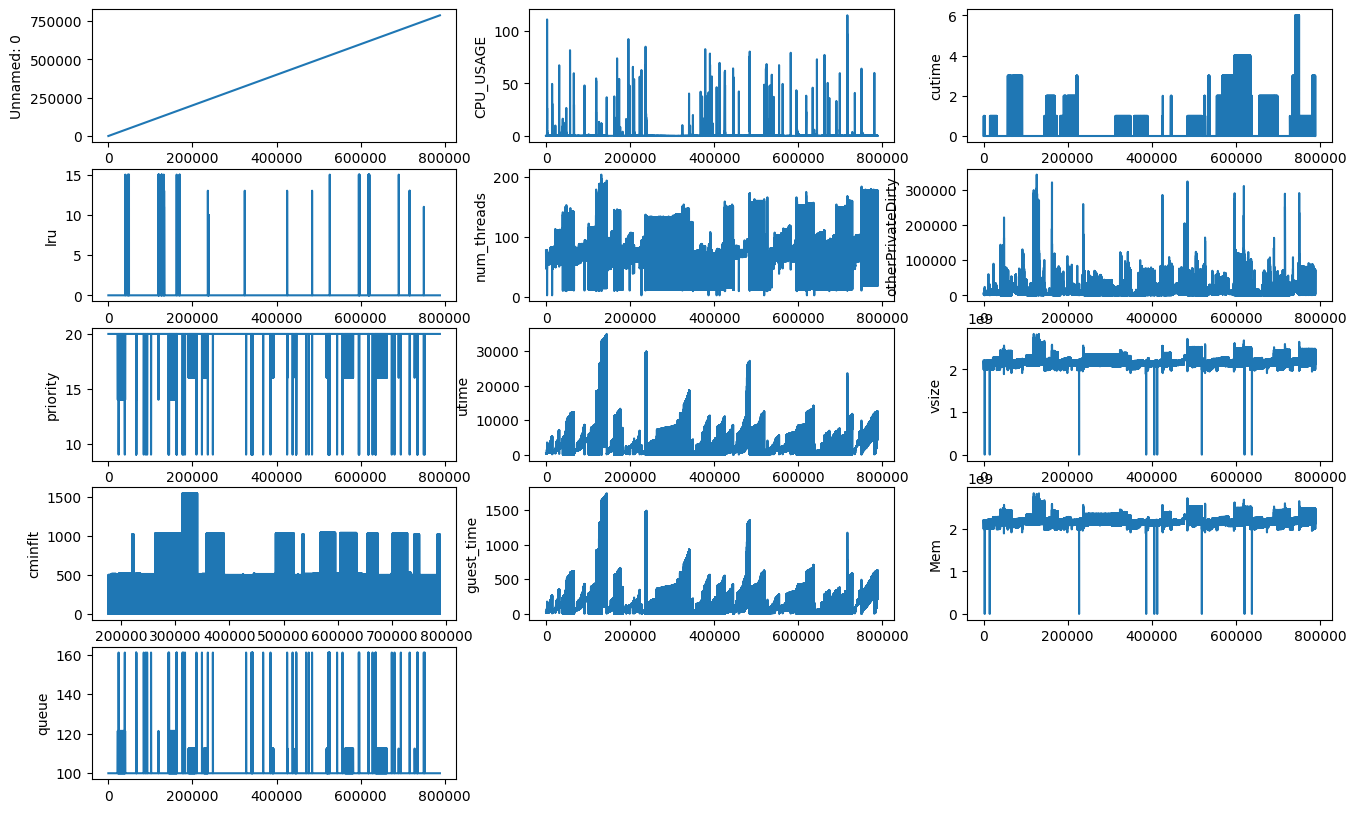

In [11]:
"""
Run this code cell to generate a panel of raw data plots.
Be patient, it will take a few seconds to complete.
Take this code and adapt it for your own analysis.
Feel free to adjust the parameters.
""";

fig = pyplot.figure(figsize=(16.0, 10.0))
nx = 3
ny = 5
columns = ( c for c in df2.columns if c != "ApplicationName" )

print("Visually inspecting individual values: ", end="")
for i, col in enumerate(columns):
    print(" ", col, sep="", end="")
    axes = fig.add_subplot(ny, nx, i+1)
    axes.set_ylabel(col)
    df2[col].plot(ax=axes)
    #if i > 3: break
print()

Visualization is a powerful tool to identify anomalies or problems in the data.
The plots shown above do not yet differentiate the different applications, but the measured stats are ordered by the time they were taken.

**DIAGNOSIS QUESTIONS**:

1. Do you notice **one** feature that behaves strangely (unlike any other features)?

2. Do you suspect some features that look identical?

Take note of these potential issues.
They may be signs of bad features---we will confirm whether this is the case, after additional checks.

*HINTS*: Remember that the dataset contains *measurement* values of CPU usage, memory usage, and other types of observables in the phone's operating system.
(Compare these measurements to temperatures, wind speeds, pressures, rainfall measures, etc. over a period of time.)
It is typical that measurements may have spikes (where events are not regular) or fluctuations (ups and downs).

-----

***(Enter your answers in this cell; these are important questions that must be answered.)***

-----

**EXERCISE**: Here's another diagnostic tool: Let's create a panel of box plots using seaborn.
Let's use this syntax to make a horizontal boxplot (you can try the other orientation by substituting `x=` with `y=`:
```python
seaborn.boxplot(x=SERIES, ax=axes)   # the `ax=` argument is needed for multi-panel plots
```
where `SERIES` is a placeholder for a specific DataFrame column.

Generating boxplots:  Unnamed: 0 CPU_USAGE cutime lru num_threads otherPrivateDirty priority utime vsize cminflt guest_time Mem queue


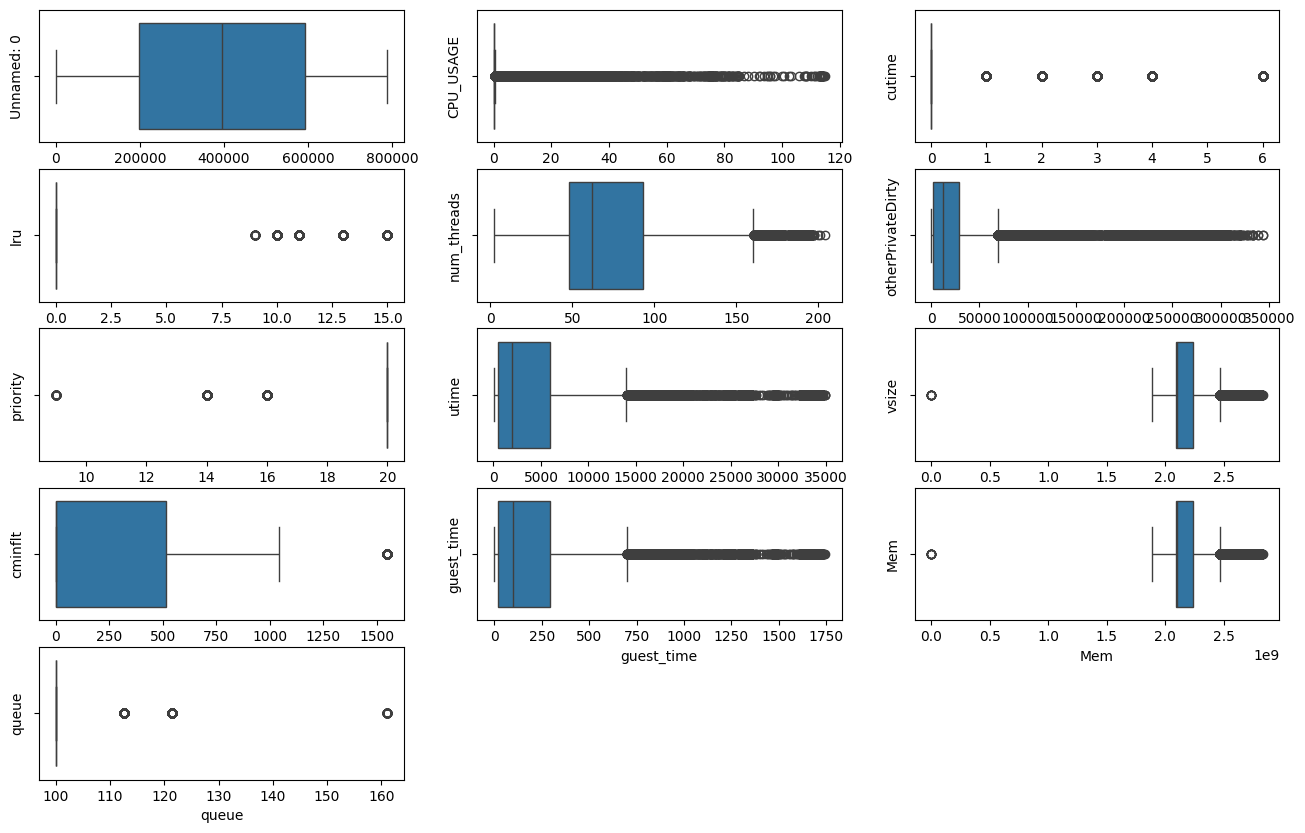

In [12]:
"""Fix up this code to generate a panel of boxplots,
similar to the panel generated above.
Uncomment and edit the commented lines.""";
fig = pyplot.figure(figsize=(16.0, 10.0))
nx = 3
ny = 5
columns = ( c for c in df2.columns if c != "ApplicationName" )

print("Generating boxplots: ", end="")
for i, col in enumerate(columns):
    print(" ", col, sep="", end="")
    #axes = #TODO
    ## (optional) Add additional code to improve the presentation (e.g. axis label)
    #seaborn.boxplot(#TODO, ax=axes)
    axes = fig.add_subplot(ny, nx, i+1)
    axes.set_ylabel(col)
    seaborn.boxplot(x=df2[col], ax=axes)
print()

**DIAGNOSIS QUESTIONS**:
Just as in the previous plot panel, we can ask again:

1. Do you notice a feature that behaves strangely (unlike any other features)?

2. Do you suspect that there are some duplicated features?

**OUTLIERS**: Individual dots shown on the box plots above indicate outliers--i.e. they are outside the (2%, 98%) of the percentiles according to [normal distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html) a.k.a. "bell curve".
Sometimes, outliers identified in this way represent bad data.
But not all features follow this idealized distribution, therefore not all outliers are bad data.
Therefore, one must consider carefully the plausible range of values in a feature before judging whether (or which) outliers are bad data.

-----

***(Enter your answers in this cell; these are important questions that must be answered.)***

-----

<a id="sec-cleanData"></a>
## 5. Cleaning Data

This sections discusses approaches involved in cleaning data.
In practice, your judgment as the data analyst is very important so as not to introduce bias into the data.

----

*REVIEW*: If you work through the diagnostic questions above, you will identify:

* one irrelevant feature;

* one feature with missing data (missing values);

* two features that are duplicate of two other features.

----

### 5.1 Useless or Irrelevant Data

**EXAMPLE**:
There is one feature in `df2` that is irrelevant because the values are the same as the labels in the index of that DataFrame.

In [14]:
"""Uncomment and run to identify one irrelevant feature (column).
The one below is just a starting point.""";

df2.head(20) 

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,0,Facebook,0.20,0.0,0,77,5776,20,464.0,2204618752,NaN,17.854415,2204618752,100.0
1,1,WhatsApp,0.12,1.0,0,47,2852,20,274.0,1992155136,NaN,11.269066,1992155136,100.0
2,2,Facebook,0.20,0.0,0,77,5776,20,464.0,2204618752,NaN,17.854415,2204618752,100.0
3,3,WhatsApp,0.12,1.0,0,47,2852,20,274.0,1992155136,NaN,11.269066,1992155136,100.0
4,4,Facebook,0.20,0.0,0,77,5764,20,464.0,2204618752,NaN,21.904244,2204618752,100.0
5,5,WhatsApp,0.12,1.0,0,47,2852,20,274.0,1992155136,NaN,10.423201,1992155136,100.0
6,6,Facebook,0.20,0.0,0,77,5764,20,464.0,2204618752,NaN,20.641736,2204618752,100.0
7,7,WhatsApp,0.12,1.0,0,47,2852,20,274.0,1992155136,NaN,11.997105,1992155136,100.0
8,8,Facebook,0.20,0.0,0,77,5764,20,464.0,2204618752,NaN,19.332573,2204618752,100.0
9,9,WhatsApp,0.12,1.0,0,47,2852,20,274.0,1992155136,NaN,9.874333,1992155136,100.0


**OPTIONAL EXERCISE**:
Use _pandas_ functions creatively to prove that this irrelevant column indeed has the same values as the row labels for all rows.
*Hints*: Use `head` and `tail`; use the comparison function--that also works between a Series and an Index object.

In [15]:
#TODO
df2.head(20) 
#--- IGNORE ---
df2.tail(20)


,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
788567,788567,Facebook,0.33,0.0,0,178,73024,20,12587.0,2482925568,0.0,625.293076,2482925568,100.0
788568,788568,Facebook,0.15,0.0,0,18,2904,20,6137.0,2123321344,0.0,303.013245,2123321344,100.0
788569,788569,WhatsApp,0.44,3.0,0,51,14912,20,4263.0,1999003648,1021.0,208.751795,1999003648,100.0
788570,788570,Facebook,0.33,0.0,0,178,73028,20,12587.0,2482925568,0.0,624.129691,2482925568,100.0
788571,788571,Facebook,0.15,0.0,0,18,2908,20,6137.0,2123321344,0.0,303.167230,2123321344,100.0
788572,788572,WhatsApp,0.44,3.0,0,51,14912,20,4263.0,1999003648,1021.0,211.766598,1999003648,100.0
788573,788573,Facebook,0.33,0.0,0,178,73028,20,12587.0,2482925568,0.0,626.237948,2482925568,100.0
788574,788574,Facebook,0.15,0.0,0,18,2908,20,6139.0,2123321344,0.0,302.533500,2123321344,100.0
788575,788575,WhatsApp,0.44,3.0,0,51,14912,20,4263.0,1999003648,1021.0,208.270780,1999003648,100.0
788576,788576,Facebook,0.33,0.0,0,178,73028,20,12587.0,2482925568,0.0,627.162674,2482925568,100.0


Useless or irrelevant columns should be removed.
You can remove column(s) using the
`df.drop([COLUMN1, COLUMN2, ...], axis=1, inplace=True)`
syntax.

**EXERCISE**:
Remove the irrelevant feature from `df2`.

In [16]:
"""Modify and uncomment to remove the irrelevant column""";

#df2.#TODO
df2 = df2.drop(columns=['queue'])
print(df2.columns)
print(df2.shape)
print (df2.head())

Index(['Unnamed: 0', 'ApplicationName', 'CPU_USAGE', 'cutime', 'lru',
       'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize',
       'cminflt', 'guest_time', 'Mem'],
      dtype='object')
(788587, 13)
   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0           0        Facebook       0.20     0.0    0           77   
1           1        WhatsApp       0.12     1.0    0           47   
2           2        Facebook       0.20     0.0    0           77   
3           3        WhatsApp       0.12     1.0    0           47   
4           4        Facebook       0.20     0.0    0           77   

   otherPrivateDirty  priority  utime       vsize  cminflt  guest_time  \
0               5776        20  464.0  2204618752      NaN   17.854415   
1               2852        20  274.0  1992155136      NaN   11.269066   
2               5776        20  464.0  2204618752      NaN   17.854415   
3               2852        20  274.0  1992155136      NaN   11.2

### 5.2 Missing Data

Missing data can be caused by several reasons. We will examine common practices for handling missing values.
We strongly encourage you to read the <a href="https://deapsecure.gitlab.io/deapsecure-lesson02-bd/30-data-wrangling-viz/index.html#missing-data" target="_blank"> lesson section on missing data</a> for a deeper understanding.

#### Missing Data Exercises

This section will help you become familiar with _pandas_' facilities for handling missing data.
We encourage discussion with other participants to help you learn.
Also consult [_pandas_ documentation on missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

Undertake the following:
 * Create a toy DataFrame named `ex0` below with some missing values
 * Explore some _pandas_ methods below for identifying and handling missing values

_pandas_ uses `nan` (a special not-a-number value defined in the `numpy` library) to denote a missing value.

In [17]:
"""Execute the following code to create a toy dataset with missing values""";

nan = numpy.nan
ex0 = pandas.DataFrame([[1,   2,   3,   0  ],
                        [3,   4,   nan, 1  ],
                        [nan, nan, nan, nan],
                        [nan, 3,   nan, 4  ]],
                       columns=['A','B','C','D'])

A DataFrame or Series object has the following methods to deal with missing data:

* `notnull()` and `isna()` methods detect the defined (non-null) or missing (null) values in the object, by returning a DataFrame or Series of boolean values;
* `dropna()` method removes the rows or columns with missing values;
* `fillna()` fills the missing cells with a default value.

Here are some examples of detecting missing data:

* `ex0.notnull()`
* `ex0.isna()`
* `ex0.isna().sum()`
* `ex0.isna().sum(axis=0)`
* `ex0.isna().sum(axis=1)`

Run these commands in the cell(s) below and observe the outcome.
What does each command mean?

In [20]:
"""Experiment with each expression above in this cell.
Create and run more cells as needed.""";

#ex0.#TODO()
# ex0.head()
ex0.notnull()
ex0.isna()


,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,True,True,True,True
3,True,False,True,False


The `isna()` method call followed by `sum()` can be used to count the number of missing values in each column (default, with `axis=0`) or row (`axis=1`).
In Python, for summing purposes, a `True` value counts as numerical 1 and a `False` as 0.

Here are some examples of handling missing data: What does each command mean?

* `ex0.dropna()`
* `ex0.dropna(how='all')`
* `ex0.dropna(axis=1)`
* `ex0.fillna(7)`
* `ex0.fillna(ex0.mean(skipna=True))`

In [21]:
"""Experiment with each expression above in this cell.
Create and run more cells as needed.""";

#ex0.#TODO()
ex0.dropna()
ex0.dropna(how='all')
ex0.dropna(axis=1)
ex0.fillna(7)
ex0.fillna(ex0.mean(skipna=True))

,A,B,C,D
0,1.0,2.0,3.0,0.000000
1,3.0,4.0,3.0,1.000000
2,2.0,3.0,3.0,1.666667
3,2.0,3.0,3.0,4.000000


**NOTE**: The `dropna()` and `fillna()` methods can be given an optional `inplace=True` argument to perform the data correction in-place (i.e. modifying the original DataFrame object).

#### Detecting Columns with Missing Data

Earlier in Sec 3.1 we described a method to detect columns with missing data using the `info` method.
Based on the *Missing Data Exercises* above, we may have discovered that there is another way to detect columns *or* rows with missing data.

**EXERCISE:** Using one of the statements already demonstrated just above, identify features (columns) in `df2` that have some missing data.
That same statement also identifies how many values in each column are missing.

In [ ]:
"""Write a code below to identify features with missing values in df2""";

#df2.#TODO

**CHALLENGE**:
What is the fraction of the missing data compared to the total number of records (rows) in the dataset?

In [ ]:
"""Use this cell to find the fraction of the rows with missing data""";
#TODO

#### Addressing Missing Data

The `cminflt` column has a significant number of missing values (over 20%). We mention several possible options in [the lesson text](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/30-data-wrangling-viz/index.html#missing-data) to deal with the case of the missing data:

* Drop all the rows that have missing any data;

* Drop the one column with missing data (cminflt) from the table;

* *Imputation*: Fill the missing value with something reasonable and plausible.

**QUESTION:** What do *you* want to do with the missing data?
Discuss the pros and cons of each possible choice!

*(Enter your response here)*

-----

**OUR COURSE OF ACTION**:
For our learning purposes, in this notebook we will simply drop the rows that have missing `cminflt` values, because we have nearly 800k rows in the original dataset. While 20% of samples with missing data sounds a lot, we still have over 600k rows after removing those rows.

-----

> **Data Cleaning in Real World** -- In real data-science projects, one will have to perform a post-analysis to get an additional confirmation that our choice of treatment of missing data is not causing a bias in the analysis.

In [ ]:
"""Use this cell to fix the missing data in df2""";

#TODO

### 5.3 Duplicate Data

There are many reasons that duplicate features can enter into a dataset.
Whether it happens during the collection or the integration of data, one must watch for duplicate data as they affect the quality of data--and the outcome of the analysis.
Common problems include duplicated rows and duplicated columns.

> * `DataFrame.duplicated()` checks row after row for duplicates and returns a Series of Boolean `True` per duplicate line
> * `reset_index()` Rearranges indexes

#### Duplicate Data Exercise (optional)

In this *optional* exercise we undertake the following:

* Create a new dataset with duplicate data in several rows
* Identify duplicates in dataset
* Remove the duplicates from the dataset

In [ ]:
"""Create a synthetic dataframe (df3) from portions of df2 with duplicates""";

# this is a set of overlapping samples from df2 but with different index
df2_extras = df2.iloc[11:17]
df2_extras.index = range(181000, 181000+df2_extras.shape[0])

df3 = pandas.concat([ df2.iloc[0:7],
                      df2.iloc[5:6],
                      df2.iloc[7:13],
                      df2_extras ])

print("Initial df3 shape:", df3.shape)
df3

In [ ]:
"""Uncomment to check for duplicates""";

#df3_dups = df3.duplicated()
#df3_dups

In [ ]:
"""Based on df3_dups, print only the labels of the rows where duplicates were found!""";
#TODO

In [ ]:
"""Uncomment and edit to remove the duplicate rows""";

#df3.drop_duplicates(inplace=True)
#print("New shape of df3 (no duplicates):", df3.shape)
#df3

> **ADVICE**: Before removing rows that appear to be duplicated, always make sure that they are genuine duplicates.
> Please check the context of the data to obtain certainty on this.
> It is *possible* that, in certain cases, the data contain two or more observations that happen to have the same values in all the columns.
> In the SherLock dataset, for example, measurements from different snapshots *could* fortuituously have exactly yielded the same set of values, although this is an extremely rare occurence.

#### Duplicate Columns

The exercise above demonstrates how one ought to deal with duplicate data appearing in multiple rows.
In an earlier part of this notebook, we visually inspected the raw data, column by column.
We noticed several pairs of features that appear identical:

* `guest_time` and `utime`;
* `vsize` and `Mem`.

Are they really identical? Features that are truly identical should be removed.
We will come back to this issue when we plot the pair correlation function below.

-----

**CHALLENGE**: Using your existing _pandas_ skill, determine whether these pairs are genuine duplicates.

-----

<a id="sec-visualization"></a>
## 6. Visualization

Visualization is a method of presenting data visually in many different ways, each uncovering patterns and trends existing in data in a particular way.
Visualization is indispensible when handling and analyzing massive amounts of data. 
In this sections we will introduce common visualization techniques that can greatly help exploratory data analysis.

We will use two major visualization libraries in Python:
Matplotlib and Seaborn:

* <a href="https://matplotlib.org" target="_blank">Matplotlib</a>: A de facto Python 2D plotting library supported in Python scripts, IPython shells and other Python platforms including Jupyter.
The plotting capabilities is provided by the `pyplot` module within this library.

* <a href="https://seaborn.pydata.org" target="_blank">Seaborn</a>: Provides a high-level interface for drawing attractive and informative statistical graphics.
Seaborn uses Matplotlib as its backend.

> *HINTS*
>
> * Use `pyplot.figure(figsize=(x_size,y_size))` in a cell to create a blank figure with a custom size.
>   This should be specified before calling the plotting functions.
>   The default plot size is `x_size=6.4` and `y_size=4.8`.
>
> * The Python code for visualization can get very complex pretty soon, given all the elements to specify (such as, axis labels, tweaking tick labels, making a panel of plots...).
>   We recommend that you adapt codes written by others that provide visualization similar to what you want, rather than writing from scratch.
>   For this reason, we provide fairly complex visualization codes in this notebook to help you start your own visualization.
>   Other good starting places are the galleries of Matplotlib or Seaborn's sample plots (see their websites).

### 6.1 Count Plot

A *count plot* shows the number of occurrences of various values in a categorical variable.
For example, to draw a count plot of the `COLUMN_NAME` column in a DataFrame `DF`, use one of the following syntaxes:
```python
seaborn.countplot(x=SERIES)
seaborn.countplot(x=COLUMN_NAME, data=DF)
```

**QUESTION:** How many records exist in `df2` for each application? Which application has more records in the the dataset?

In [ ]:
"""Modify and uncomment to generate a countplot of ApplicationName in 'df2' DataFrame""";

#seaborn.countplot(x='#TODO', data=#TODO)

*The graph above displays a count plot representing the number of records for each application recorded in the `df2` dataframe.*

**EXERCISE**: Using grouping and aggregation operations described in the previous notebook, cross-check the count plots above.

In [ ]:
"""Modify and uncomment code below to count the number of records
grouped by the individual application names.""";

#df2.#TODO('#TODO').size()

### 6.2 Histogram

A histogram displays the distribution of values (shape and spread) in the form of vertical bars.
The range of the values are partitioned equally into multiple bins on the horizontal axis.
The frequency of values within each bin's range is displayed as a vertical bar for each bin. 
Taller bars show that more data points fall in those bin ranges.

In this section, we will experiment with histograms produced using Matplotlib and Seaborn packages to demonstrate their capabilities.

#### Histogram with Pyplot

We produce a histogram plot of `COLUMN_NAME` of the `df` DataFrame using the following syntax:
```python
pyplot.hist(df[COLUMN_NAME], bins=BIN_COUNT)
```
The `bins=BIN_COUNT` argument sets the number of bins to display.

**EXERCISE**:
Using `pyplot`, create a histogram of `CPU_USAGE` column in `df2` using 20 bins.

In [ ]:
"""Modify and uncomment to plot a histogram of CPU_USAGE in df2 DataFrame using 20 bins""";

#hist_plot = pyplot.hist(#TODO,bins=#TODO)

*Comment*: The `pyplot.hist` returns a tuple of three components: 

  * An array of value counts on the individual bins
  * An array of bin edges
  * A list of `Patch` objects, each corresponding to a histogram bin

**QUESTIONS**:

  * How many bars were visibly plotted?
  * How many bars are actually displayed?
    *Hints*: Look at `hist_plot[0]`; also look at the (x) range of the bins.
  * What is the range of values of `CPU_USAGE` in the dataset?

**OPTIONAL EXERCISES**:

  * Examine the content of `hist_plot` to learn about these values.
    The arrays are helpful for close-up analysis.
  * Can we alter the appearance of the plot so that the other bars are visible?

#### Histogram (Distribution) Plot with Seaborn

Seaborn generates a histogram plot of `df[COLUMN_NAME]` using the following syntax:
```python
seaborn.distplot(df[COLUMN_NAME], kde=False, bins=BIN_COUNT)
```

**EXERCISE**:
Re-create the histogram of `df2['CPU_USAGE']` using `seaborn` package, also with 20 bins.

In [ ]:
"""Modify and uncomment to plot a histogram of 'CPU_USAGE' in df2 DataFrame using seaborn""";

#res_sns = seaborn.distplot(#TODO)

#### Comments on Plotting Packages

The plotting packages have a lot of "knobs" to adjust the appearance (visual) of the graph.
For example, it can alternatively draw the bars horizontally (flipping the meaning of the axes):

In [ ]:
hist_plot = pyplot.hist(df2['CPU_USAGE'], bins=20, orientation='horizontal')

Of the two histogram plots drawn with the two different packages, which plot has more desirable appearance to you?

> Seaborn is a newer package and is still under heavy development.
> For example, newer version of Seaborn has `seaborn.displot` function which is a new interface to replace `seaborn.distplot`.
> The new `displot` function produces a graph that has all the necessary axis labels.
> The version of `seaborn` on Wahab is not currently supporting this function.

#### Plotting Exercises

**EXERCISE**: Plot a histogram of `priority` in `df2` using `pyplot`.

In [ ]:
"""Modify and uncomment to plot a histogram of priority in df2 using pyplot with 20 bins""";

# Res = pyplot.hist(#TODO,#TODO)

**QUESTIONS**:

* How many bars are visible?
* How many bars are actually displayed? *Hints*: Look at `Res[0]`; also look at the (x) range of the bins.

Upon completing this exercise, you will observe that `priority` contains integer values with only a few values displayed.
Frequently, data appearing as such after plotting is a tell-tale sign of `categorical` or `ordinal` data.

**EXERCISE**:
Plot a histogram of `num_threads` in `df2` using pyplot (plt).

In [ ]:
"""Modify and uncomment to plot a histogram of `num_threads` in df2 using pyplot with 20 bins""";

#Res2 = pyplot.#TODO(df2['#TODO'], bins=#TODO)

Upon completing the exercise, observe the number of threads shows a multimodal (two major and smaller peaks).
The histogram plots so far, however, mixes the data from two apps (Facebook and WhatsApp) in one graph.
Let us try to separate them visually.

#### Drawing Multiple Histograms in One Plot

We can further plot a histogram of `num_threads` grouped by application type.
Showing multiple graphs for different categories in one plot can shed some light.

**OPTIONAL EXERCISE**: Replot the histogram above by separating the `num_threads` belonging to Facebook from those of WhatsApp.
Draw the two histogram bars in one plot.

In [ ]:
"""Create a combined histogram plot where we separate the records
belonging to the two different apps.
Modify and uncomment appropriate to run""";

# get the num threads for Facebook
#nthrds_FB = df2[#TODO]['num_threads']
# get the num threads for WhatsApp
#nthrds_WA = #TODO

# (Optional) Get the min and max values for *all* the app categories
# so we have a uniform histogram appearance
min_val = df2['num_threads'].min()
max_val = df2['num_threads'].max()
print('num_threads range:', min_val, '..', max_val)

# Uncomment and edit to display the histograms
#pyplot.hist(nthrds_FB, label='Facebook', bins=20)
#pyplot.hist(#TODO)

# Hint: add the `range=(min_val,max_val)` argument to both function calls above
# to make the bars have the same width

# Uncomment this one to get the legend:
# pyplot.legend()

**QUESTION**:
Upon completion of the plot, can you observe the different characteristics of the two applications?
Discuss the differences based on the visual cues.

### 6.3  Box Plot

Box plot displays data distribution based on a five number summary as follows;
* Minimum
* First quartile (Q1)
* Median
* Third quartile (Q3)
* Maximum 

**Note**
> * Interquartile range (IQR): 25th to the 75th percentile.
> * “maximum”: Q3 + 1.5*IQR
> * “minimum”: Q1 -1.5*IQR 

We have covered box plot earlier in this notebook; please see that part for code examples.

#### Exercise

Use `seaborn.boxplot(df2[COLUMN_NAME])` to create a box plot with Seaborn.
In this exercise, create a boxplot of first 2000 records of `guest_time` in `df2`.

In [ ]:
"""Modify and uncomment to select and plot all records of 'guest_time' in 'df2'  Dataframe""";

##TODO(df2[#TODO].guest_time)

### 6.4 Bar Plot

A bar plot displays an estimate of central tendency of numerical variables, with the height of each rectangle being its mean value and the errorbar providing some indication of the uncertainty around that mean value. The syntax is as follows:

```python
seaborn.barplot(x=CATEGORY_COLUMN, y=COLUMN, data=DF)
```

This will plot the bar plot of `DF[COLUMN]` values, grouped by the different categories according to `DF[CATEGORY_COLUMN]`.

**EXERCISE**:
Create a bar plot of `CPU_USAGE` to show the average CPU usage of the two different apps in `df2`.

In [ ]:
"""Modify and uncomment to plot a barplot""";

#seaborn.barplot(x=#TODO, y=#TODO, data=df2)

**QUESTION**: Which application uses more CPU on average?

*Notes*: Standard deviation of the samples can be plotted (instead of the uncertainty of the mean) by adding `ci='std'` argument on the function call.

#### Questions and Discussions

* Which type of data can use a barplot to present?
* What are black lines in barplot?
* Can you try other parameters and infer some interesting result?

<a id="sec-data-correlation"></a>
## 7. Correlations Among Features

"In statistics, *correlation* or *dependence* is any statistical relationship, whether causal or not, between two random variables or bivariate data.
In the broadest sense, correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related."
([Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence))
See the [lesson for further explanation](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/30-data-wrangling-viz/index.html#correlations).

While previous sections focused on individual features within a dataset, many times correlations exist amongst these features which could affect the quality of the dataset.
Two features (variables) are said to be *correlated* when the value changes in one feature is accompanied by the changes in the other feature in a systematic fashion.
Visualization is a great tool to help identify correlations.

### 7.1 Scatter Plot and Joint Plot

*Scatter plots* display a variable pair as points in a two-dimensional plot. The value of one variable is shown on one axis whereas the value from the other is on the other axis.
With this kind of plot, we can visually identify how much one variable affects the other.
Related to scatter plot, there is a variation of the plot called *joint plot*, where the two-dimensional scatter plot is superimposed with the one-dimensional distributions (i.e. histograms) on the two axes.
Use the following syntaxes to create a scatter plot and/or a joint plot:

```python
seaborn.scatterplot(x=COLUMN_NAME_1, y=COLUMN_NAME_2, data=DF)
seaborn.jointplot(x=COLUMN_NAME_2, y=COLUMN_NAME_2, data=DF)
```

where `COLUMN_NAME_1` and `COLUMN_NAME_2` are the names of the columns of the variable pair in the `DF` DataFrame.

**EXERCISE**:
Create a scatter plot of the following column pairs in `df2` DataFrame:

* X-axis: `utime` Y-axis: `vsize`
* X-axis: `Mem` Y-axis: `vsize`

Optionally, create a jointplot using `utime` on x-axis and `vsize` on y-axis.

In [ ]:
"""Plot a scatter plot of vsize against utime in df2 DataFrame and explain the output""";

#TODO

In [ ]:
"""Plot a scatter plot of vsize against Mem in df2 DataFrame and explain the output""";

#TODO

Correlations among two features would appear as patterns in the scatter plot.
When two features are correlated, then there is a strong interdependence of the value of one feature to the other.
In such a case, we can *guess* what the value of the second feature, knowing the value of the first feature.
When the two features are not correlated, the scatter plot contain randomly distributed points with no clear trend.

**QUESTIONS**:

1. From the scatter plots above, which variable pairs exhibit 

In [ ]:
"""plot a jointplot of vsize against Mem in df2 DataFrame and explain output""";

#TODO

### 7.2 Pair Plot

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of <br/>
axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution <br/>
of each variable on the diagonal Axes:


#### 7.2.1 Exercise

Create a dataframe with plot a pairplot of it using codes below
 * `df2_demo=df2.iloc[:,5:9]`
 * `seaborn.pairplot(df2_demo)`

In [ ]:
"""Enter codes above to create a dataframe and plot a pairplot""";

#TODO

In [ ]:
df2_demo = df2[['CPU_USAGE', 'num_threads', 'otherPrivateDirty', 'priority', 'vsize']]
seaborn.pairplot(df2_demo)

In [ ]:
df2_demo.columns

### 7.3 Correlation Heat Map

A *correlation heat map* shows indicates correlations that exist between pairs of variables ("pairwise correlations") in a color-coded image plot.
The color indicates the magnitude of the correlation. 

**EXERCISE**

Let us compute and plot the pairwise correlation among pairs of variables in the dataset.

We will use the following functions/methods:

* `DataFrame.corr()` -- Computes pairwise correlation of columns, excluding NA/null values. By default the Pearson correlation function is used.
* `seaborn.heatmap(matrix, [options...])` -- Plots a heatmap by passing in a computed correlated dataframe

This exercise entails the following steps:

* Compute the pairwise correlations of `df2`, save them in a new dataframe called `df_corr`.
* Plot a heat map of the correlation dataframe.

In [ ]:
"""Modify and uncomment to create a heat map of df2 pairwise correlations""";

#df_corr = #TODO
#pyplot.figure(figsize=(12, 12)) 
#seaborn.#TODO(#TODO, annot=True, vmax=1, square=True, cmap="Blues")
#pyplot.show()

**EXPLANATION**

Two variables have a linear relationship if changes in one affects the other by a proportional constant. Mathematically,

```
var2 = constant * var1
```

The Pearson correlation function returns 1.0 if the correlation is perfect with a positive constant factor.
It returns -1.0 if the correlation is perfect with a negative constant factor.

For this exercise, observe and discuss the heatmap plotted just above.
Identify a few pairs that have very strong correlations (+1 or -1).

 * By definition, the diagonal element of the heat map is +1 because the a variable is linearly correlated with itself.

 * It appears that `vsize` has a perfect correlation with `Mem`.
   In fact, you can prove this fact using _pandas_, `Mem` is identical to `vsize`.
   On the other hand, `utime` and `vsize` don’t have this kind of relationship.

 * Identify two other pairs that have strong correlations (+1 or -1).
 
 * Identify another pair that is highly correlated (the absolute value is well above 0.5).

## Conclusion

To conclude the activities in this notebook, please write down all your observation on the following issues:

### Issues with Data in `sherlock_mystery_2apps.csv`

#### Missing data

Which column(s) (feature[s]) have missing data?
What course of action do we choose to deal with this issue?

*--> (enter your response here)*

#### Irrelevant Data

Which column(s) contain irrelevant data for our analysis?

*--> (enter your response here)*

#### Duplicate Data

Which column(s) contain duplicate of the other column(s).

*--> (enter your response here, e.g. Column "X" is a duplicate feature of column "Y")*

## Observed Patterns in Data

* Which application uses more CPU cycles on average? Facebook or WhatsApp?

* Which application uses more memory on average?

* Which pair of features have high correlations?

*--> (enter your response here)*